In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_squared_log_error as MSLE

df = pd.read_excel('2023년(22년 실적) 공공도서관 입력데이터_최종.xlsx')
df['대출권수_전자자료산출불가'].astype('str')
df = df[df['지역']=='경기']
df = df[df['대출권수_전자자료산출불가']=='N']
df = df[df['대출자수_전자자료_성인'] >= 0 ]
df = df.rename(columns = {"도서관_건물 연면적" : "도서관_건물_연면적"})

### 처음에 Y에 총예산 넣고 X에는 ,'대출자수_전자자료_성인','대출권수_전자자료_성인_사회과학','대출권수_전자자료_성인_기술과학','대출권수_전자자료_성인_문학', '대출권수_전자자료_성인_역사'
X = df[['이용자수_도서관방문자수', '대출자수_인쇄자료_성인', '도서관_건물_연면적','회원등록자수_연령별회원등록_성인','홈페이지접속수','모바일웹접속건수','도서관총예산']]
Y = df['대출자수_전자자료_성인']

In [2]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 36 to 1226
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   이용자수_도서관방문자수       50 non-null     int64  
 1   대출자수_인쇄자료_성인       50 non-null     int64  
 2   도서관_건물_연면적         50 non-null     float64
 3   회원등록자수_연령별회원등록_성인  50 non-null     int64  
 4   홈페이지접속수            50 non-null     int64  
 5   모바일웹접속건수           50 non-null     int64  
 6   도서관총예산             50 non-null     int64  
dtypes: float64(1), int64(6)
memory usage: 3.1 KB


In [3]:
X.describe()

,이용자수_도서관방문자수,대출자수_인쇄자료_성인,도서관_건물_연면적,회원등록자수_연령별회원등록_성인,홈페이지접속수,모바일웹접속건수,도서관총예산
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,5.000000e+01,5.000000e+01
mean,202950.440000,19411.560000,4416.617400,25296.580000,5.962322e+05,5.288600e+05,1.686042e+06
std,200222.581242,55710.313996,3998.719369,29033.662939,6.489316e+05,7.697067e+05,1.307521e+06
min,0.000000,619.000000,286.000000,71.000000,2.547900e+04,0.000000e+00,2.479270e+05
25%,50818.750000,2722.000000,1494.750000,6072.250000,1.439478e+05,2.658800e+04,7.247562e+05
50%,145225.500000,8031.000000,2879.850000,14599.500000,2.196645e+05,2.332830e+05,1.176760e+06
75%,255558.750000,13026.500000,6358.500000,36277.750000,9.980470e+05,6.044988e+05,2.530488e+06
max,984665.000000,382733.000000,14900.000000,156258.000000,2.625823e+06,4.245495e+06,5.466124e+06


<Axes: >

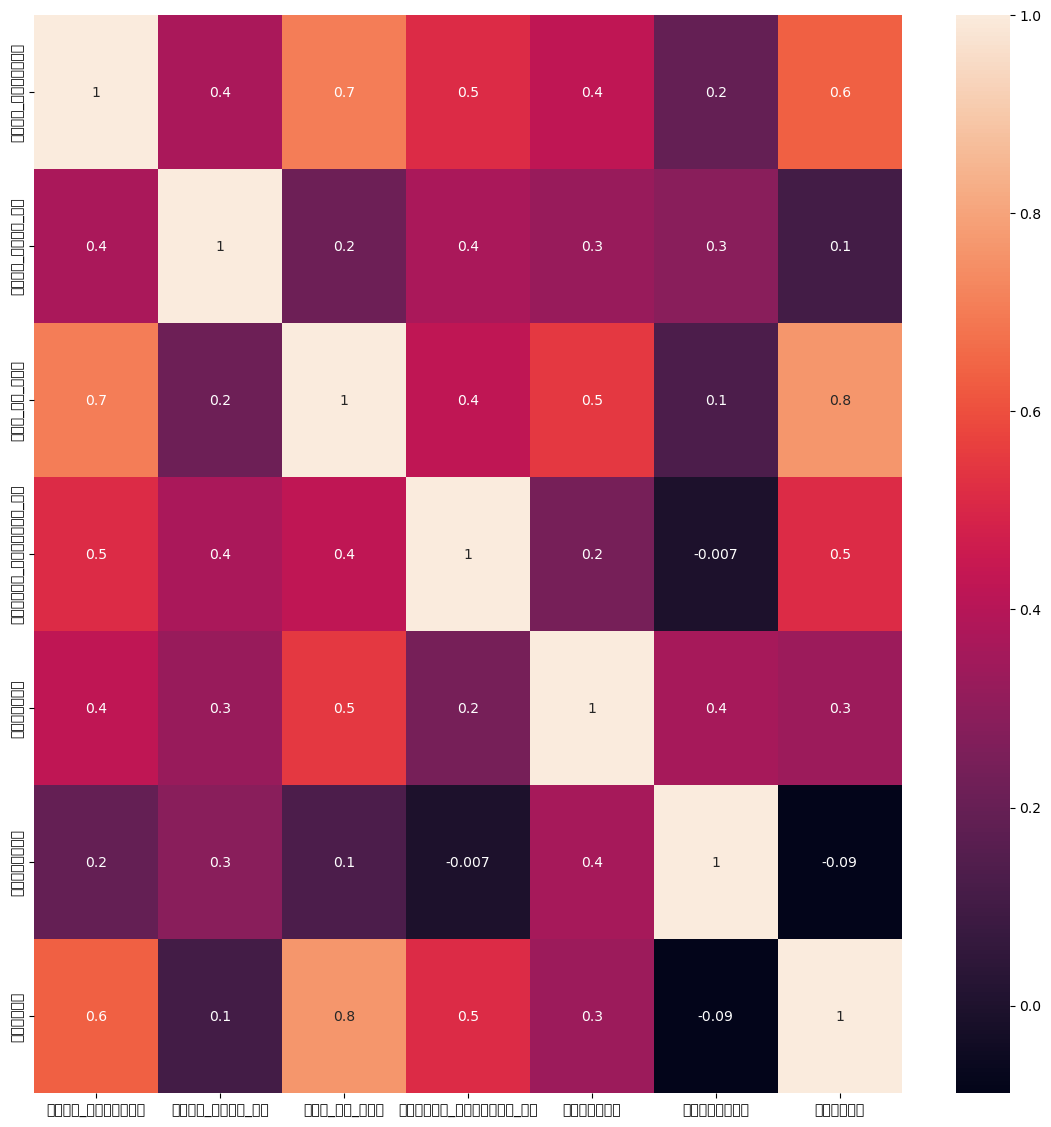

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr,annot=True, fmt='.1g')

In [5]:
X.corr()

,이용자수_도서관방문자수,대출자수_인쇄자료_성인,도서관_건물_연면적,회원등록자수_연령별회원등록_성인,홈페이지접속수,모바일웹접속건수,도서관총예산
이용자수_도서관방문자수,1.000000,0.368652,0.703474,0.512103,0.422753,0.193059,0.635582
대출자수_인쇄자료_성인,0.368652,1.000000,0.216576,0.369896,0.325100,0.288430,0.104229
도서관_건물_연면적,0.703474,0.216576,1.000000,0.422620,0.546114,0.130633,0.764616
회원등록자수_연령별회원등록_성인,0.512103,0.369896,0.422620,1.000000,0.241342,-0.006936,0.512627
홈페이지접속수,0.422753,0.325100,0.546114,0.241342,1.000000,0.361168,0.333091
모바일웹접속건수,0.193059,0.288430,0.130633,-0.006936,0.361168,1.000000,-0.088483
도서관총예산,0.635582,0.104229,0.764616,0.512627,0.333091,-0.088483,1.000000


In [6]:
import pandas as pd
import statsmodels.api as sm

model = sm.OLS(Y, X).fit() # 회귀 모델 학습

model.summary() # 결과 출력

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           대출자수_전자자료_성인   R-squared (uncentered):                   0.869
Model:                            OLS   Adj. R-squared (uncentered):              0.847
Method:                 Least Squares   F-statistic:                              40.69
Date:                Wed, 30 Aug 2023   Prob (F-statistic):                    6.06e-17
Time:                        22:59:25   Log-Likelihood:                         -459.83
No. Observations:                  50   AIC:                                      933.7
Df Residuals:                      43   BIC:                                      947.0
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
이용자수_도서관방문자수          0.0010      0.003      0.332      0.742      -0.005       0.007
대출자수_인쇄자료_성인          0.0073      0.008      0.933      0.356      -0.008       0.023
도서관_건물_연면적           -0.2367      0.174     -1.358      0.182      -0.588       0.115
회원등록자수_연령별회원등록_성인    -0.0260      0.016     -1.611      0.114      -0.058       0.007
홈페이지접속수               0.0046      0.001      6.314      0.000       0.003       0.006
모바일웹접속건수              0.0031      0.001      6.010      0.000       0.002       0.004
도서관총예산                0.0008      0.000      1.751      0.087      -0.000       0.002
==============================================================================
Omnibus:                        9.989   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               26.214
Skew:                           0.015   Prob(JB):                     2.03e-06
Kurtosis:                       6.547   Cond. No.                     1.09e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
# 다중공선성 
# vif 10 넘으면 다중공선성 있음.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif = vif.sort_values('VIF Factor').reset_index(drop=True)
vif

,VIF Factor,features
0,1.586493,대출자수_인쇄자료_성인
1,1.710828,모바일웹접속건수
2,2.871576,회원등록자수_연령별회원등록_성인
3,3.067197,홈페이지접속수
4,5.118652,이용자수_도서관방문자수
5,7.086932,도서관총예산
6,8.076145,도서관_건물_연면적


In [8]:
from sklearn.metrics import mean_squared_log_error as MSLE

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y ,test_size=0.3, random_state=11)

# rmsle로 평가지표로 나올때 
model1 = LinearRegression().fit(X_train, y_train)
y_pred = model1.predict(X_test) # y_pred -> 1D ndarray
y_pred = np.where(y_pred<0, -y_pred, y_pred)
A,B,C = model1.score(X_train, y_train), model1.score(X_test, y_test), MSLE(y_test,y_pred)**0.5
print(f'{A:.4f} {B:.4f} {C:.4f}')

0.7086 0.9426 2.1325


In [9]:
# mallow's cp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False ## 마이나스 '-' 표시 제대로 출력
 
from itertools import combinations
from statsmodels.formula.api import ols
 

df.insert(0,'Intercept',[1]*len(df)) ## 상수항 추가

In [10]:
fit = ols('대출자수_전자자료_성인~이용자수_도서관방문자수+대출자수_인쇄자료_성인+도서관_건물_연면적+회원등록자수_연령별회원등록_성인+홈페이지접속수+모바일웹접속건수+도서관총예산',data=df).fit() ## 풀 모형 적합
 
## hat matrix 계산
X = np.array(X) ## Model matrix for full model
 
X_tX = np.matmul(X.transpose(),X)
X_tX_inv = np.linalg.inv(X_tX)
hat_matrix = np.matmul(np.matmul(X,X_tX_inv),X.transpose()) ## hat matrix
diagonals = np.array([hat_matrix[i][i] for i in range(len(df))]) ## hat matrix의 대각원소
 
response = '대출자수_전자자료_성인'
y = df[response] ## 반응 변수 벡터
variables = ['이용자수_도서관방문자수', '대출자수_인쇄자료_성인', '도서관_건물_연면적','회원등록자수_연령별회원등록_성인','홈페이지접속수','모바일웹접속건수','도서관총예산'] 
## 총 변수집합
 
num_var = len(variables) ## 총 변수 개수
num_data = len(df) ## 데이터 개수
mse_full = fit.mse_resid ## 모든 변수를 포함한 mean square residual
mean_response = np.mean(y) ## y의 평균
 
cp_list = [] ## Mallow's C
ad_r_list = [] ## 수정된 결정계수
aic_list = [] ## Akaike's information criterion
bic_list = [] ## Bayes information criterion
press_list = [] ## press criterion
 
num_parameter = [] ## 파라미터 즉 절편을 포함한 회귀계수의 개수
subsets = [] ## 변수의 집합
for p in range(num_var+1):
    if p == 0: ## 절편만 있는 모형
        var_exp = '1'
        exp = response + ' ~ ' + var_exp
        subsets.append('None') ## 절편만 있고 변수는 없음
        sub_fit = ols(exp,data=df).fit() ## 절편만 있는 모형 적합
        sse = np.sum(np.square(sub_fit.resid)) ## square sum of residual
        sst = np.sum(np.square(y-mean_response)) ## total sum of square
        cp = sse/mse_full - (num_data-2*(p+1)) ## Mallow's C
        ad_r = 0 ## 수정된 결정계수 절편만 있다면 수정된 결정계수 값은 0
        aic = num_data*np.log(sse) - num_data*np.log(num_data) + 2*(p+1) ## Akaike's information criterion
        bic = num_data*np.log(sse) - num_data*np.log(num_data) + np.log(num_data)*(p+1) ## Bayes information criterion
        press = np.sum(np.square(np.divide(sub_fit.resid,1-diagonals))) ## press
        cp_list.append(cp)
        ad_r_list.append(ad_r)
        aic_list.append(aic)
        bic_list.append(bic)
        press_list.append(press)
        num_parameter.append(p+1)
    else:
        selected_var = combinations(variables,p)
        for s in selected_var:
            var_exp = '+'.join(s)
            exp = response + ' ~ ' + var_exp
            subsets.append(', '.join(s))
            sub_fit = ols(exp,data=df).fit()
            sse = np.sum(np.square(sub_fit.resid))
            sst = np.sum(np.square(y-np.mean(y)))
            cp = sse/mse_full - (num_data-2*(p+1))
            ad_r = 1 - ((num_data-1)/(num_data-p-1))*(sse/sst)
            aic = num_data*np.log(sse) - num_data*np.log(num_data) + 2*(p+1)
            bic = num_data*np.log(sse) - num_data*np.log(num_data) + np.log(num_data)*(p+1)
            press = np.sum(np.square(np.divide(sub_fit.resid,1-diagonals)))
            cp_list.append(cp)
            ad_r_list.append(ad_r)
            aic_list.append(aic)
            bic_list.append(bic)
            press_list.append(press)
            num_parameter.append(p+1)
 
df_res = pd.DataFrame()
df_res['Variables'] = subsets
df_res['Number_of_parameter'] = num_parameter
df_res['Ad_R'] = ad_r_list
df_res['Cp'] = cp_list
df_res['AIC'] = aic_list
df_res['BIC'] = bic_list
df_res['PRESS'] = press_list

In [11]:
df_res.reset_index(inplace=True)
df_res.head()

,index,Variables,Number_of_parameter,Ad_R,Cp,AIC,BIC,PRESS
0,0,None,1,0.000000,144.184101,855.156216,857.068239,7.276922e+09
1,1,이용자수_도서관방문자수,2,0.108177,121.896294,850.400851,854.224897,4.134881e+09
2,2,대출자수_인쇄자료_성인,2,0.106307,122.248494,850.505628,854.329674,3.282813e+09
3,3,도서관_건물_연면적,2,0.113178,120.954853,850.119698,853.943744,5.231129e+09
4,4,회원등록자수_연령별회원등록_성인,2,-0.012549,144.624505,856.748804,860.572850,6.121880e+09


In [12]:
df_res.sort_values('Ad_R', ascending=False).head()

,index,Variables,Number_of_parameter,Ad_R,Cp,AIC,BIC,PRESS
119,119,"도서관_건물_연면적, 회원등록자수_연령별회원등록_성인, 홈페이지접속수, 모바일웹접속...",6,0.750620,5.036400,790.335841,801.807979,6.961310e+08
126,126,"대출자수_인쇄자료_성인, 도서관_건물_연면적, 회원등록자수_연령별회원등록_성인, 홈...",7,0.750347,6.104332,791.241059,804.625220,5.298693e+08
97,97,"도서관_건물_연면적, 홈페이지접속수, 모바일웹접속건수, 도서관총예산",5,0.748150,4.450339,789.952156,799.512271,5.758115e+08
125,125,"이용자수_도서관방문자수, 도서관_건물_연면적, 회원등록자수_연령별회원등록_성인, 홈...",7,0.746478,6.756866,792.010016,805.394177,6.424174e+08
98,98,"회원등록자수_연령별회원등록_성인, 홈페이지접속수, 모바일웹접속건수, 도서관총예산",5,0.746157,4.802107,790.346285,799.906400,6.983106e+08


In [13]:
df_res.sort_values('AIC', ascending=True).head()

,index,Variables,Number_of_parameter,Ad_R,Cp,AIC,BIC,PRESS
26,26,"홈페이지접속수, 모바일웹접속건수",3,0.744786,3.046024,788.789845,794.525914,5.785825e+08
63,63,"홈페이지접속수, 모바일웹접속건수, 도서관총예산",4,0.743583,4.262117,789.949698,797.597790,5.675383e+08
97,97,"도서관_건물_연면적, 홈페이지접속수, 모바일웹접속건수, 도서관총예산",5,0.748150,4.450339,789.952156,799.512271,5.758115e+08
60,60,"회원등록자수_연령별회원등록_성인, 홈페이지접속수, 모바일웹접속건수",4,0.741656,4.609785,790.324052,797.972144,6.365566e+08
119,119,"도서관_건물_연면적, 회원등록자수_연령별회원등록_성인, 홈페이지접속수, 모바일웹접속...",6,0.750620,5.036400,790.335841,801.807979,6.961310e+08


In [14]:
df_res.sort_values('BIC', ascending=True).head()

,index,Variables,Number_of_parameter,Ad_R,Cp,AIC,BIC,PRESS
26,26,"홈페이지접속수, 모바일웹접속건수",3,0.744786,3.046024,788.789845,794.525914,5.785825e+08
63,63,"홈페이지접속수, 모바일웹접속건수, 도서관총예산",4,0.743583,4.262117,789.949698,797.597790,5.675383e+08
60,60,"회원등록자수_연령별회원등록_성인, 홈페이지접속수, 모바일웹접속건수",4,0.741656,4.609785,790.324052,797.972144,6.365566e+08
51,51,"대출자수_인쇄자료_성인, 홈페이지접속수, 모바일웹접속건수",4,0.740251,4.863397,790.595373,798.243465,5.552469e+08
41,41,"이용자수_도서관방문자수, 홈페이지접속수, 모바일웹접속건수",4,0.739757,4.952526,790.690377,798.338469,5.622040e+08


In [15]:
df_res['best'] = df_res['Number_of_parameter']-df_res['Cp']
df_res['abs'] = abs(df_res['best'])
df_res.sort_values('abs', ascending=True).head()  

,index,Variables,Number_of_parameter,Ad_R,Cp,AIC,BIC,PRESS,best,abs
127,127,"이용자수_도서관방문자수, 대출자수_인쇄자료_성인, 도서관_건물_연면적, 회원등록자수...",8,0.745036,8.000000,793.117008,808.413192,5.160141e+08,0.000000,0.000000
118,118,"대출자수_인쇄자료_성인, 회원등록자수_연령별회원등록_성인, 홈페이지접속수, 모바일웹...",6,0.745051,5.997388,791.440041,802.912179,5.281453e+08,0.002612,0.002612
26,26,"홈페이지접속수, 모바일웹접속건수",3,0.744786,3.046024,788.789845,794.525914,5.785825e+08,-0.046024,0.046024
98,98,"회원등록자수_연령별회원등록_성인, 홈페이지접속수, 모바일웹접속건수, 도서관총예산",5,0.746157,4.802107,790.346285,799.906400,6.983106e+08,0.197893,0.197893
117,117,"대출자수_인쇄자료_성인, 도서관_건물_연면적, 홈페이지접속수, 모바일웹접속건수, 도...",6,0.743653,6.238610,791.713424,803.185562,5.774316e+08,-0.238610,0.238610


In [16]:
df_res.loc[127,:].Variables

'이용자수_도서관방문자수, 대출자수_인쇄자료_성인, 도서관_건물_연면적, 회원등록자수_연령별회원등록_성인, 홈페이지접속수, 모바일웹접속건수, 도서관총예산'

In [17]:
df_res.loc[118,:].Variables

'대출자수_인쇄자료_성인, 회원등록자수_연령별회원등록_성인, 홈페이지접속수, 모바일웹접속건수, 도서관총예산'

In [18]:
df_res.loc[26,:].Variables

'홈페이지접속수, 모바일웹접속건수'

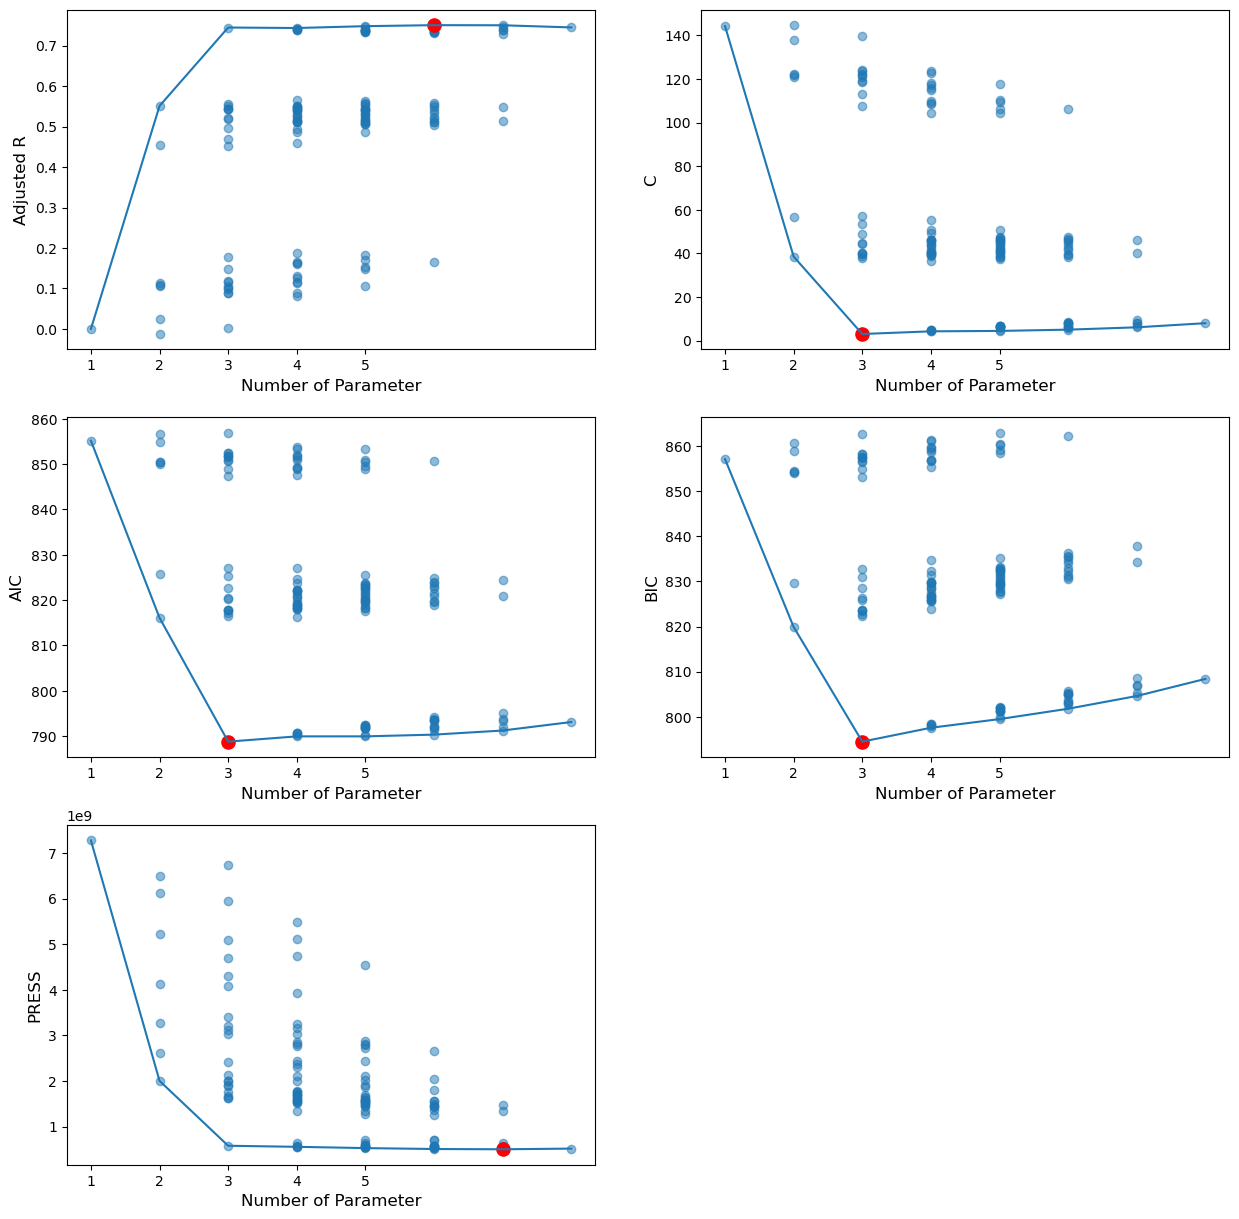

In [19]:
# Cp 적절한 거 찾기
fig = plt.figure(figsize=(15,15))
fig.set_facecolor('white')
font_size = 12
columns = ['Ad_R', 'Cp', 'AIC', 'BIC', 'PRESS']
xlabel = 'Number of Parameter'
ylabels = ['Adjusted R','C','AIC','BIC','PRESS']
 
marker_style = dict(color='red',marker='o',markersize=10)
 
for i in range(len(ylabels)):
    ind = 320+i+1
    plt.subplot(ind)
    plt.scatter(df_res['Number_of_parameter'],df_res[columns[i]],alpha=0.5)
    plt.xlabel(xlabel,fontsize=font_size)
    plt.ylabel(ylabels[i],fontsize=font_size)
    if ylabels[i] == 'Adjusted R':
        temp_df = df_res.groupby('Number_of_parameter',as_index=False)[columns[i]].max()
        idx = temp_df[columns[i]].idxmax()
        max_val = temp_df[columns[i]].max()
        plt.scatter(temp_df['Number_of_parameter'][idx], max_val,s=90,color='red')
        plt.plot(temp_df['Number_of_parameter'],temp_df[columns[i]])
    else:
        temp_df = df_res.groupby('Number_of_parameter',as_index=False)[columns[i]].min()
        idx = temp_df[columns[i]].idxmin()
        min_val = temp_df[columns[i]].min()
        plt.scatter(temp_df['Number_of_parameter'][idx], min_val,s=90,color='red')
        plt.plot(temp_df['Number_of_parameter'],temp_df[columns[i]])
    plt.xticks(range(1,6))
 
plt.show()

In [20]:
# 127
Y = df['대출자수_전자자료_성인']
X = df[['이용자수_도서관방문자수', '대출자수_인쇄자료_성인', '도서관_건물_연면적', '회원등록자수_연령별회원등록_성인', '홈페이지접속수','모바일웹접속건수', '도서관총예산']]

<Axes: >

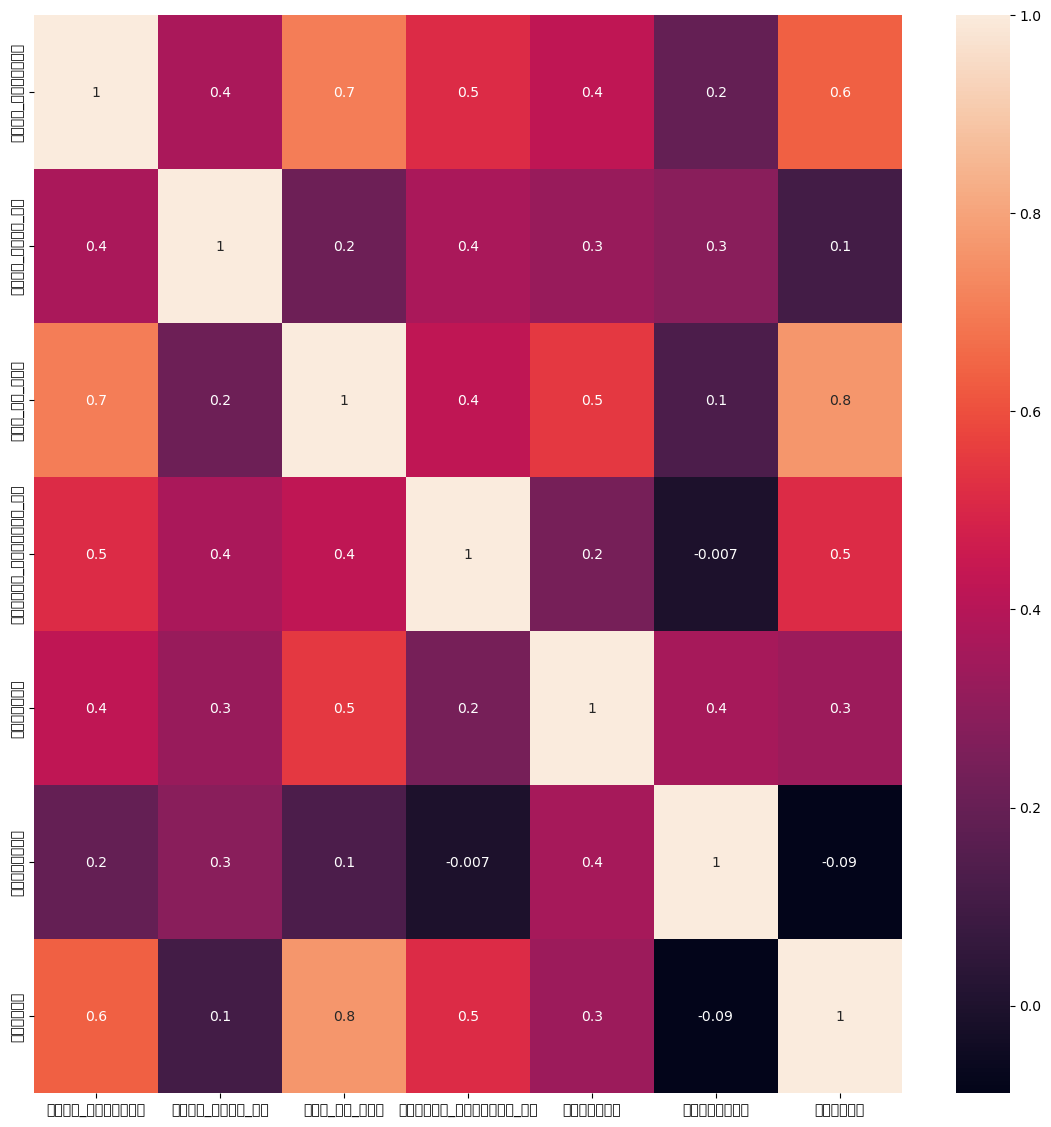

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr,annot=True, fmt='.1g')

In [22]:
X.corr()

,이용자수_도서관방문자수,대출자수_인쇄자료_성인,도서관_건물_연면적,회원등록자수_연령별회원등록_성인,홈페이지접속수,모바일웹접속건수,도서관총예산
이용자수_도서관방문자수,1.000000,0.368652,0.703474,0.512103,0.422753,0.193059,0.635582
대출자수_인쇄자료_성인,0.368652,1.000000,0.216576,0.369896,0.325100,0.288430,0.104229
도서관_건물_연면적,0.703474,0.216576,1.000000,0.422620,0.546114,0.130633,0.764616
회원등록자수_연령별회원등록_성인,0.512103,0.369896,0.422620,1.000000,0.241342,-0.006936,0.512627
홈페이지접속수,0.422753,0.325100,0.546114,0.241342,1.000000,0.361168,0.333091
모바일웹접속건수,0.193059,0.288430,0.130633,-0.006936,0.361168,1.000000,-0.088483
도서관총예산,0.635582,0.104229,0.764616,0.512627,0.333091,-0.088483,1.000000


In [23]:
import pandas as pd
import statsmodels.api as sm

model = sm.OLS(Y, X).fit() # 회귀 모델 학습

model.summary() # 결과 출력

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           대출자수_전자자료_성인   R-squared (uncentered):                   0.869
Model:                            OLS   Adj. R-squared (uncentered):              0.847
Method:                 Least Squares   F-statistic:                              40.69
Date:                Wed, 30 Aug 2023   Prob (F-statistic):                    6.06e-17
Time:                        22:59:28   Log-Likelihood:                         -459.83
No. Observations:                  50   AIC:                                      933.7
Df Residuals:                      43   BIC:                                      947.0
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
이용자수_도서관방문자수          0.0010      0.003      0.332      0.742      -0.005       0.007
대출자수_인쇄자료_성인          0.0073      0.008      0.933      0.356      -0.008       0.023
도서관_건물_연면적           -0.2367      0.174     -1.358      0.182      -0.588       0.115
회원등록자수_연령별회원등록_성인    -0.0260      0.016     -1.611      0.114      -0.058       0.007
홈페이지접속수               0.0046      0.001      6.314      0.000       0.003       0.006
모바일웹접속건수              0.0031      0.001      6.010      0.000       0.002       0.004
도서관총예산                0.0008      0.000      1.751      0.087      -0.000       0.002
==============================================================================
Omnibus:                        9.989   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               26.214
Skew:                           0.015   Prob(JB):                     2.03e-06
Kurtosis:                       6.547   Cond. No.                     1.09e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# 다중공선성 
# vif 10 넘으면 다중공선성 있음.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif = vif.sort_values('VIF Factor').reset_index(drop=True)
vif

,VIF Factor,features
0,1.586493,대출자수_인쇄자료_성인
1,1.710828,모바일웹접속건수
2,2.871576,회원등록자수_연령별회원등록_성인
3,3.067197,홈페이지접속수
4,5.118652,이용자수_도서관방문자수
5,7.086932,도서관총예산
6,8.076145,도서관_건물_연면적


In [25]:
model1 = LinearRegression(n_jobs=3).fit(X_train, y_train)
y_pred = model1.predict(X_test) # y_pred -> 1D ndarray
y_pred = np.where(y_pred<0, -y_pred, y_pred)
A,B,C,D = model1.score(X_train, y_train), model1.score(X_test, y_test),r2_score(y_test, y_pred),MSLE(y_test,y_pred)**0.5
print(f'{A:.4f} {B:.4f} {C:.4f} {D:.4f}')

0.7086 0.9426 0.9426 2.1325


In [26]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor().fit(X_train, y_train)
y_pred = model.predict(X_test) # y_pred -> 1D ndarraymodel = DecisionTreeRegressor(max_depth=10).fit(x_train, y_train)
y_pred = np.where(y_pred<0, -y_pred, y_pred)
a,b,c,d = model.score(X_train,y_train), model.score(X_test,y_test),r2_score(y_test,y_pred), MSLE(y_test,y_pred)**0.5
print(a,b,c,d)


0.7092601433511398 0.8707333189808899 0.8707333189808899 2.285443957017235


In [27]:
model3 = RandomForestRegressor(n_estimators=250).fit(X_train, y_train)
y_pred = model3.predict(X_test) # y_pred -> 1D ndarray
y_pred = np.where(y_pred<0, -y_pred, y_pred)
A,B,C,D = model3.score(X_train, y_train), model3.score(X_test, y_test), r2_score(y_test,y_pred), MSLE(y_test,y_pred)**0.5
print(f'{A:.4f} {B:.4f} {C:.4f} {D:.4f}')

0.9215 0.8702 0.8702 2.4368


In [28]:
######################################################################################

In [29]:
############# 118
Y = df['대출자수_전자자료_성인']
X = df[['대출자수_인쇄자료_성인', '회원등록자수_연령별회원등록_성인', '홈페이지접속수', '모바일웹접속건수', '도서관총예산']]

<Axes: >

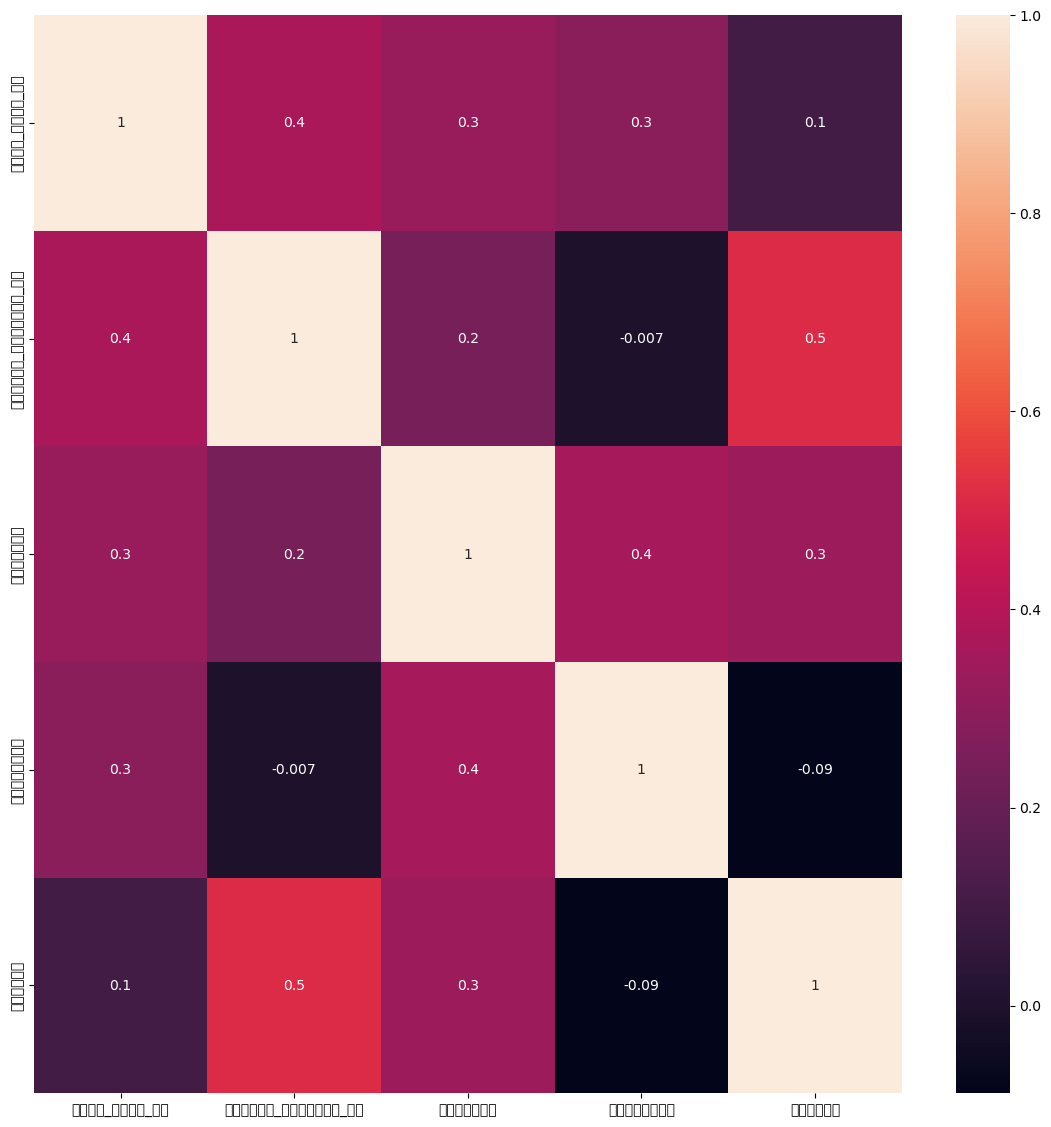

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr,annot=True, fmt='.1g')

In [31]:
scaler = StandardScaler()
X1 = scaler.fit_transform(X)
X_train,X_test, y_train, y_test = train_test_split(X1, Y, test_size=0.2, random_state=11)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test,y_preds)))

MSE : 1294734.156, RMSE : 1137.864
Variance score : 0.939


In [32]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의
coeff = pd.Series(data = np.round(lr.coef_,1), index=X.columns)
coeff.sort_values(ascending=False)

홈페이지접속수              2543.7
모바일웹접속건수             2383.6
도서관총예산                814.4
대출자수_인쇄자료_성인          421.5
회원등록자수_연령별회원등록_성인    -640.4
dtype: float64

In [33]:
from sklearn.model_selection import cross_val_score


# cross_val_score()로 5 폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함.
neg_mse_scores = cross_val_score(lr, X, Y,scoring="neg_mean_squared_error",cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print(' 5 folds 의 개별 Negative MSE scores:',np.round(neg_mse_scores,2))
print(' 5 folds 의 개별 RMSE scores:',np.round(rmse_scores,2))
print(' 5 folds 의 개별 RMSE :',np.round(avg_rmse,2))

 5 folds 의 개별 Negative MSE scores: [ -4667911.63 -16510237.2  -13180588.25  -5569309.1   -2695526.4 ]
 5 folds 의 개별 RMSE scores: [2160.54 4063.28 3630.51 2359.94 1641.81]
 5 folds 의 개별 RMSE : 2771.21


In [34]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:',np.round(lr.coef_,1))

절편 값: 4225.8262677653565
회귀 계수값: [ 421.5 -640.4 2543.7 2383.6  814.4]


In [35]:
import pandas as pd
import statsmodels.api as sm

model = sm.OLS(Y, X).fit() # 회귀 모델 학습

model.summary() # 결과 출력

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           대출자수_전자자료_성인   R-squared (uncentered):                   0.863
Model:                            OLS   Adj. R-squared (uncentered):              0.848
Method:                 Least Squares   F-statistic:                              56.76
Date:                Wed, 30 Aug 2023   Prob (F-statistic):                    2.60e-18
Time:                        22:59:29   Log-Likelihood:                         -460.89
No. Observations:                  50   AIC:                                      931.8
Df Residuals:                      45   BIC:                                      941.3
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
대출자수_인쇄자료_성인          0.0073      0.008      0.959      0.343      -0.008       0.023
회원등록자수_연령별회원등록_성인    -0.0246      0.016     -1.558      0.126      -0.056       0.007
홈페이지접속수               0.0042      0.001      6.290      0.000       0.003       0.006
모바일웹접속건수              0.0030      0.001      6.066      0.000       0.002       0.004
도서관총예산                0.0004      0.000      1.332      0.190      -0.000       0.001
==============================================================================
Omnibus:                       15.962   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.060
Skew:                          -0.607   Prob(JB):                     3.66e-11
Kurtosis:                       7.647   Cond. No.                         100.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# 다중공선성 
# vif 10 넘으면 다중공선성 있음.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif = vif.sort_values('VIF Factor').reset_index(drop=True)
vif

,VIF Factor,features
0,1.502751,대출자수_인쇄자료_성인
1,1.643731,모바일웹접속건수
2,2.615941,홈페이지접속수
3,2.759587,회원등록자수_연령별회원등록_성인
4,3.150224,도서관총예산


In [37]:
model1 = LinearRegression(n_jobs=3).fit(X_train, y_train)
y_pred = model1.predict(X_test) # y_pred -> 1D ndarray
y_pred = np.where(y_pred<0, -y_pred, y_pred)
A,B,C,D = model1.score(X_train, y_train), model1.score(X_test, y_test),r2_score(y_test, y_pred),MSLE(y_test,y_pred)**0.5
print(f'{A:.4f} {B:.4f} {C:.4f} {D:.4f}')

0.7351 0.9385 0.9385 2.5606


In [38]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor().fit(X_train, y_train)
y_pred = model.predict(X_test) # y_pred -> 1D ndarraymodel = DecisionTreeRegressor(max_depth=10).fit(x_train, y_train)
y_pred = np.where(y_pred<0, -y_pred, y_pred)
a,b,c,d = model.score(X_train,y_train), model.score(X_test,y_test),r2_score(y_test,y_pred), MSLE(y_test,y_pred)**0.5
print(a,b,c,d)

0.6522918411033942 0.8713113732831057 0.8713113732831057 2.8257654383117448


In [39]:
model3 = RandomForestRegressor(n_estimators=250).fit(X_train, y_train)
y_pred = model3.predict(X_test) # y_pred -> 1D ndarray
y_pred = np.where(y_pred<0, -y_pred, y_pred)
A,B,C,D = model3.score(X_train, y_train), model3.score(X_test, y_test), r2_score(y_test,y_pred), MSLE(y_test,y_pred)**0.5
print(f'{A:.4f} {B:.4f} {C:.4f} {D:.4f}')

0.9402 0.8651 0.8651 3.0254


In [40]:
############################## 26
Y = df['대출자수_전자자료_성인']
X = df[['홈페이지접속수', '모바일웹접속건수']]

In [41]:
X.corr()

,홈페이지접속수,모바일웹접속건수
홈페이지접속수,1.000000,0.361168
모바일웹접속건수,0.361168,1.000000


In [42]:
X.describe()

,홈페이지접속수,모바일웹접속건수
count,5.000000e+01,5.000000e+01
mean,5.962322e+05,5.288600e+05
std,6.489316e+05,7.697067e+05
min,2.547900e+04,0.000000e+00
25%,1.439478e+05,2.658800e+04
50%,2.196645e+05,2.332830e+05
75%,9.980470e+05,6.044988e+05
max,2.625823e+06,4.245495e+06


In [43]:
# 다중공선성 
# vif 10 넘으면 다중공선성 있음.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif = vif.sort_values('VIF Factor').reset_index(drop=True)
vif

,VIF Factor,features
0,1.578421,모바일웹접속건수
1,1.578421,홈페이지접속수


In [44]:
import pandas as pd
import statsmodels.api as sm

model = sm.OLS(Y, X).fit() # 회귀 모델 학습

model.summary() # 결과 출력

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           대출자수_전자자료_성인   R-squared (uncentered):                   0.855
Model:                            OLS   Adj. R-squared (uncentered):              0.849
Method:                 Least Squares   F-statistic:                              141.0
Date:                Wed, 30 Aug 2023   Prob (F-statistic):                    8.02e-21
Time:                        22:59:30   Log-Likelihood:                         -462.41
No. Observations:                  50   AIC:                                      928.8
Df Residuals:                      48   BIC:                                      932.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
홈페이지접속수        0.0045      0.001      8.560      0.000       0.003       0.005
모바일웹접속건수       0.0031      0.000      6.318      0.000       0.002       0.004
==============================================================================
Omnibus:                       15.069   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               45.924
Skew:                          -0.532   Prob(JB):                     1.07e-10
Kurtosis:                       7.573   Cond. No.                         2.02
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
scaler = StandardScaler()
X1 = scaler.fit_transform(X)
X_train,X_test, y_train, y_test = train_test_split(X1, Y, test_size=0.2, random_state=11)

lr = LinearRegression(n_jobs=3)
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test,y_preds)))

MSE : 1184509.211, RMSE : 1088.352
Variance score : 0.944


In [46]:
scaler = StandardScaler()
X1 = scaler.fit_transform(X)
X_train,X_test, y_train, y_test = train_test_split(X1, Y, test_size=0.2, random_state=11)

rf = RandomForestRegressor().fit(X_train,y_train)
y_preds = rf.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test,y_preds)))

MSE : 5305632.130, RMSE : 2303.396
Variance score : 0.748


In [47]:
scaler = StandardScaler()
X1 = scaler.fit_transform(X)
X_train,X_test, y_train, y_test = train_test_split(X1, Y, test_size=0.2, random_state=11)

rr = Ridge(alpha=0.1).fit(X_train,y_train)
y_preds = rr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test,y_preds)))

MSE : 1196036.252, RMSE : 1093.634
Variance score : 0.943


In [48]:
scaler = StandardScaler()
X1 = scaler.fit_transform(X)
X_train,X_test, y_train, y_test = train_test_split(X1, Y, test_size=0.2, random_state=11)

ls = Lasso(alpha=0.1).fit(X_train,y_train)
y_preds = ls.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test,y_preds)))

MSE : 1184676.899, RMSE : 1088.429
Variance score : 0.944


In [49]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:',np.round(lr.coef_,1))

절편 값: 4213.915083004485
회귀 계수값: [2805.7 2342.3]


In [50]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의
coeff = pd.Series(data = np.round(lr.coef_,1), index=X.columns)
coeff.sort_values(ascending=False)

홈페이지접속수     2805.7
모바일웹접속건수    2342.3
dtype: float64

In [51]:
model1 = LinearRegression(n_jobs=3).fit(X_train, y_train)
y_pred = model1.predict(X_test) # y_pred -> 1D ndarray
y_pred = np.where(y_pred<0, -y_pred, y_pred)
A,B,C,D = model1.score(X_train, y_train), model1.score(X_test, y_test),r2_score(y_test, y_pred),MSLE(y_test,y_pred)**0.5
print(f'{A:.4f} {B:.4f} {C:.4f} {D:.4f}')

0.7162 0.9438 0.9438 2.8369


In [52]:
model1 = LinearRegression(n_jobs=3).fit(X_train, y_train)
y_pred = model1.predict(X_test) # y_pred -> 1D ndarray
y_pred = np.where(y_pred<0, -y_pred, y_pred)
A,B = r2_score(y_test, y_pred), MSLE(y_test,y_pred)**0.5
print(f'{A:.2f} {B:.2f}')

0.94 2.84


In [53]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor().fit(X_train, y_train)
y_pred = model.predict(X_test) # y_pred -> 1D ndarraymodel = DecisionTreeRegressor(max_depth=10).fit(x_train, y_train)
y_pred = np.where(y_pred<0, -y_pred, y_pred)
a,b,c,d = model.score(X_train,y_train), model.score(X_test,y_test),r2_score(y_test,y_pred), MSLE(y_test,y_pred)**0.5
print(a,b,c,d)

0.7714239727054266 0.8857093645818755 0.8857093645818755 2.9125503026956934


In [54]:
model3 = RandomForestRegressor(n_estimators=250).fit(X_train, y_train)
y_pred = model3.predict(X_test) # y_pred -> 1D ndarray
y_pred = np.where(y_pred<0, -y_pred, y_pred)
A,B,C,D = model3.score(X_train, y_train), model3.score(X_test, y_test), r2_score(y_test,y_pred), MSLE(y_test,y_pred)**0.5
print(f'{A:.4f} {B:.4f} {C:.4f} {D:.4f}')

0.9408 0.7242 0.7242 3.1373


In [55]:
from sklearn.linear_model import Ridge
scaler = StandardScaler()
X1 = scaler.fit_transform(X)
X_train,X_test, y_train, y_test = train_test_split(X1, Y, test_size=0.2, random_state=11)
model3 = Ridge().fit(X_train,y_train)
y_pred = model3.predict(X_test) # y_pred -> 1D ndarray
y_pred = np.where(y_pred<0, -y_pred, y_pred)
A,B,C,D = model3.score(X_train, y_train), model3.score(X_test, y_test), r2_score(y_test,y_pred), MSLE(y_test,y_pred)**0.5
print(f'{A:.4f} {B:.4f} {C:.4f} {D:.4f}')

0.7160 0.9382 0.9382 2.8951


In [56]:
from sklearn.linear_model import Lasso
scaler = StandardScaler()
X1 = scaler.fit_transform(X)
X_train,X_test, y_train, y_test = train_test_split(X1, Y, test_size=0.2, random_state=11)
model3 = Lasso().fit(X_train,y_train)
y_pred = model3.predict(X_test) # y_pred -> 1D ndarray
y_pred = np.where(y_pred<0, -y_pred, y_pred)
A,B,C,D = model3.score(X_train, y_train), model3.score(X_test, y_test), r2_score(y_test,y_pred), MSLE(y_test,y_pred)**0.5
print(f'{A:.4f} {B:.4f} {C:.4f} {D:.4f}')

0.7162 0.9437 0.9437 2.8378


In [57]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor().fit(X_train, y_train)
y_pred = model.predict(X_test) # y_pred -> 1D ndarraymodel = DecisionTreeRegressor(max_depth=10).fit(x_train, y_train)
y_pred = np.where(y_pred<0, -y_pred, y_pred)
a,b,c,d = model.score(X_train,y_train), model.score(X_test,y_test),r2_score(y_test,y_pred), MSLE(y_test,y_pred)**0.5
print(a,b,c,d)

0.7714239727054266 0.8857093645818755 0.8857093645818755 2.9125503026956934
